In [8]:
from srcs.extractData import extractData
from srcs.normalise import normaliseDf
from srcs.estimatedPrice import estimatedPrice
from srcs.trainModel import trainModel
import matplotlib.pyplot as plt
import matplotlib.animation as anim


In [9]:
df = extractData('data/data.csv')
df

,km,price
0,240000.0,3650.0
1,139800.0,3800.0
2,150500.0,4400.0
3,185530.0,4450.0
4,176000.0,5250.0
5,114800.0,5350.0
6,166800.0,5800.0
7,89000.0,5990.0
8,144500.0,5999.0
9,84000.0,6200.0


In [10]:
normedDf = normaliseDf(df)
normedDf

,km,price
0,1.000000,0.000000
1,0.538464,0.032328
2,0.587749,0.161638
3,0.749103,0.172414
4,0.705206,0.344828
5,0.423310,0.366379
6,0.662830,0.463362
7,0.304471,0.504310
8,0.560113,0.506250
9,0.281440,0.549569


In [11]:
print(estimatedPrice(1, thetas=(1, 2)))

3


In [12]:
thetas = trainModel(normedDf, plot=True)
print(thetas)

[0.9393173602406848, -1.0035716004483461, [(0, 0), (0.2889906609195402, 0.07574309695631626), (0.419850334252999, 0.09241460755150055), (0.482278880882899, 0.08397722373651334), (0.5150120948982881, 0.06508602539867442), (0.5347795914073517, 0.04205938573114306), (0.5488087123215024, 0.01761615947171625), (0.5602236665534271, -0.00707882355112192), (0.5703768599758366, -0.03153152803799174), (0.5798555567805492, -0.05553734341525719), (0.5889165540284855, -0.07901641533930916), (0.5976738744654702, -0.10194254784715306), (0.6061798135340685, -0.12431250881539391), (0.6144599370922891, -0.1461327812809311), (0.6225281951783758, -0.16741384769028111), (0.6303934499147283, -0.18816772671467125), (0.6380622960248019, -0.208406914389916), (0.6455402804701772, -0.22814393152078688), (0.6528324307905315, -0.24739113275345861), (0.6599434849018756, -0.26616062852348155), (0.6668779919443495, -0.2844642556340084), (0.6736403574094635, -0.30231356872612103), (0.6802348641681637, -0.3197198406666

In [13]:
testdf = normedDf.copy(deep=True)

testdf['test'] = testdf['km'].apply(lambda x: thetas[0] + thetas[1] * x)
testdf

,km,price,test
0,1.000000,0.000000,-0.064254
1,0.538464,0.032328,0.398931
2,0.587749,0.161638,0.349469
3,0.749103,0.172414,0.187539
4,0.705206,0.344828,0.231592
5,0.423310,0.366379,0.514496
6,0.662830,0.463362,0.274120
7,0.304471,0.504310,0.633759
8,0.560113,0.506250,0.377204
9,0.281440,0.549569,0.656872


/tmp/ipykernel_1382120/2406522862.py:15: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  a = anim.FuncAnimation(fig, update, repeat=False, interval=10)


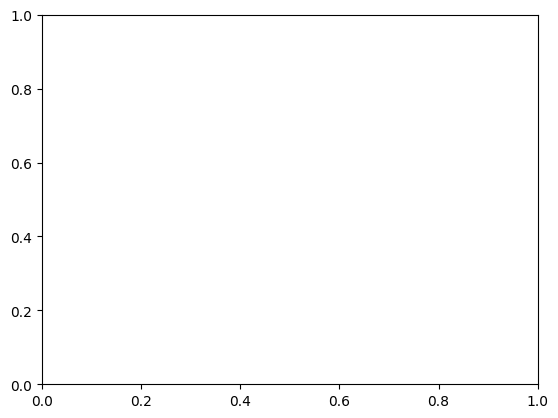

In [14]:
haaaha: list = list(thetas[2])
y = []
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


def update(i):
    t = haaaha.pop(0)
    testdf['test'] = testdf['km'].apply(lambda x: t[0] + t[1] * x)
    ax.clear()
    ax.scatter(testdf['price'], testdf['km'])
    ax.plot(testdf['test'], testdf['km'], color='red')


a = anim.FuncAnimation(fig, update, repeat=False, interval=10)
plt.show()